<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-85/blob/main/Reto_entrega2_equipo85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y Analítica de Datos**
###Tecnológico de Monterrey
###Dra. María de la Paz Rico

## **Reto-> Entrega 2 (18/11)**
###**Clasificación-ensambles y presentación ejecutiva**
Fecha: 18/Nov/2022

**Nombres y matrículas de los integrantes del equipo:**

Pablo Alejandro Bravo Vargas - A01793024

Antonio Saenz Ramirez - A01793884

**Limpieza, análisis, visualización y agrupamiento.**

En esta base de datos encontrarás:

* Aguas subterraneas.
* Aguas superficiales.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

* Limpieza de base de datos.
* Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
  * Identificando tendencias centrales promedio, media y mediana de los datos. 
  * Identificar medidas de dispersión, máximo, mínimo .
  * Identificar medidas de posición no centrales , los cuartiles , outliers.   
  * Identificar correlaciones.
  * Preparar los datos 
* Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
* Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 6.0 MB/s 
     |████████████████████████████████| 1.0 MB 41.5 MB/s 
     |████████████████████████████████| 1.7 MB 47.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 56.2 MB/s 
     |████████████████████████████████| 6.3 MB 36.9 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=51e69c572107fd31c79bfdb3a9842abf1c15ecbc149e1e2d0cd9ef66eebd7439
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=a320eaab31cb7bc2b147f3cdb04d5049917efdeb6c3daef04f17c045da77a1f8
  Stored in directory: /root/.

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math #Esta libreria la usamos lara el ramsey y el Mape
import matplotlib.pyplot as plt
import requests, zipfile #Librerira para zip de nuestros origen de datos
import geopandas as gpd
from shapely.geometry import Point

from io import BytesIO
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from google.colab import drive

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import QuantileTransformer #Esta libreria la usamos al graficar datos
from sklearn.preprocessing import power_transform #esta igual
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Esta tambien la usamoie en el ejercicio 5e
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

In [ ]:
# Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv
url = 'https://raw.githubusercontent.com/Tecnologico-de-Monterrey-MNA/actividades-semanales-iayaa-djmerk66/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv?token=GHSAT0AAAAAAB2MXBR6IFCOJQGC25NCREYAY3VW37Q'
# req = requests.get(url)
# zipfile.ZipFile(BytesIO(req.content)).extractall('zip/')
df_source=pd.read_csv(url, encoding = 'latin1')
df_source.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


# Limpieza de base de datos.

In [ ]:
# Inspección de los datos
df = df_source.copy()
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [ ]:
# Verificamos si hay conlumnas con datos nulos
df.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [ ]:
# Primero hay que analizar y limpiar el Dataset para prepararlo hacia las imputaciones:

numeric_columns = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
# La columna SDT_mg/L no se incluye ya que viene vacía

new_df = df[numeric_columns]

new_df


,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [ ]:
# Checamos los Value Counts por Columna para comenzar a revisar la distribución de valores
for column in numeric_columns:
  print("Value Counts for column", new_df.value_counts(column))
  print("--------------------------------------------")

Value Counts for column ALC_mg/L
157.62     5
257.85     4
168.72     4
197.58     4
161.00     4
          ..
189.72     1
189.81     1
190.05     1
190.06     1
1650.00    1
Length: 816, dtype: int64
--------------------------------------------
Value Counts for column CONDUCT_mS/cm
777.0      6
412.0      4
577.0      4
598.0      4
736.0      4
          ..
754.0      1
758.0      1
760.0      1
763.0      1
18577.0    1
Length: 801, dtype: int64
--------------------------------------------
Value Counts for column SDT_M_mg/L
317      4
320      4
292      4
380      4
496      4
        ..
264.8    1
265.4    1
265.8    1
267      1
<25      1
Length: 925, dtype: int64
--------------------------------------------
Value Counts for column FLUORUROS_mg/L
<0.2      162
0.5202      3
0.466       3
0.805       2
0.614       2
         ... 
0.4542      1
0.457       1
0.4592      1
0.46        1
0.6723      1
Length: 862, dtype: int64
--------------------------------------------
Value Coun

In [ ]:
# Hacemos la transformación de datos, cambiando los valores tipo objeto (ej. '<0.2') a float

for column in numeric_columns:
  new_df[column] = new_df[column].astype('str')
  new_df[column] = new_df[column].str.replace('<25','25') 
  new_df[column] = new_df[column].str.replace('<0.2','0.2') 
  new_df[column] = new_df[column].str.replace('<20','20') 
  new_df[column] = new_df[column].str.replace('<1.1','1.1')
  new_df[column] = new_df[column].str.replace('<0.02','0.02') 
  new_df[column] = new_df[column].str.replace('<0.01','0.01') 
  new_df[column] = new_df[column].str.replace('<0.003','0.003')
  new_df[column] = new_df[column].str.replace('<0.005','0.004') 
  new_df[column] = new_df[column].str.replace('<0.0005','0.0004') 
  new_df[column] = new_df[column].str.replace('<0.0015','0.0015') 
  new_df[column] = new_df[column].str.replace('<0.025','0.025')  
  new_df[column]= new_df[column].astype('float')

new_df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [ ]:
# Verificamos cómo queda nuestro df

new_df.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [ ]:
new_df.isnull().sum().sort_values(ascending=False)

CONDUCT_mS/cm          6
ALC_mg/L               4
SDT_M_mg/L             2
DUR_mg/L               1
N_NO3_mg/L             1
FLUORUROS_mg/L         0
COLI_FEC_NMP/100_mL    0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [ ]:
# Checamos los Value Counts por Columna para comenzar a revisar la distribución de valores
for column in numeric_columns:
  print("Value Counts for column", new_df.value_counts(column))
  print("--------------------------------------------")

Value Counts for column ALC_mg/L
157.62     5
257.85     4
168.72     4
197.58     4
161.00     4
          ..
189.72     1
189.81     1
190.05     1
190.06     1
1650.00    1
Length: 816, dtype: int64
--------------------------------------------
Value Counts for column CONDUCT_mS/cm
777.0      6
412.0      4
577.0      4
598.0      4
736.0      4
          ..
754.0      1
758.0      1
760.0      1
763.0      1
18577.0    1
Length: 801, dtype: int64
--------------------------------------------
Value Counts for column SDT_M_mg/L
292.0      4
320.0      4
380.0      4
496.0      4
317.0      4
          ..
444.0      1
445.4      1
446.0      1
449.0      1
82170.0    1
Length: 925, dtype: int64
--------------------------------------------
Value Counts for column FLUORUROS_mg/L
0.2000     162
0.4660       3
0.5202       3
0.5900       2
0.5620       2
          ... 
0.4523       1
0.4542       1
0.4570       1
0.4592       1
34.8033      1
Length: 862, dtype: int64
----------------------

In [ ]:
# Hacemos las imputaciones con la mediana

for column in numeric_columns:
  mediana = new_df[column].median() 
  new_df[column]= new_df[column].replace(np.nan, mediana)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


# Explorar cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

In [ ]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.6400,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.4000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.0000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.0000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.0200,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.012476,0.154435,0.0040,0.004000,0.004000,0.004000,5.003200


In [ ]:
new_df.mean()

ALC_mg/L                235.558455
CONDUCT_mS/cm          1137.133052
SDT_M_mg/L              895.454185
FLUORUROS_mg/L            1.075600
DUR_mg/L                347.842003
COLI_FEC_NMP/100_mL     355.490356
N_NO3_mg/L                4.317663
AS_TOT_mg/L               0.019618
CD_TOT_mg/L               0.003030
CR_TOT_mg/L               0.012476
HG_TOT_mg/L               0.000467
PB_TOT_mg/L               0.004310
MN_TOT_mg/L               0.072478
FE_TOT_mg/L               0.410387
dtype: float64

In [ ]:
new_df.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.217212,0.079572,0.068860,0.243404,-0.016338,-0.000346,0.073458,0.032706,-0.014234,0.069779,0.016989,0.129942,0.043454
CONDUCT_mS/cm,0.217212,1.000000,0.286244,-0.025071,0.692656,0.018021,0.219881,-0.005047,0.029083,0.004436,0.057007,0.024816,0.095940,0.083172
SDT_M_mg/L,0.079572,0.286244,1.000000,-0.013709,0.347211,-0.001102,0.101522,-0.010092,0.010807,-0.000494,0.020332,0.002517,0.018963,0.020103
FLUORUROS_mg/L,0.068860,-0.025071,-0.013709,1.000000,-0.149549,0.003564,-0.019672,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.243404,0.692656,0.347211,-0.149549,1.000000,0.031772,0.301581,-0.106417,0.025010,0.007317,0.064998,-0.017304,0.083868,0.059789
COLI_FEC_NMP/100_mL,-0.016338,0.018021,-0.001102,0.003564,0.031772,1.000000,-0.000926,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,-0.000346,0.219881,0.101522,-0.019672,0.301581,-0.000926,1.000000,-0.007950,-0.009353,-0.015157,0.011367,-0.017317,-0.036810,0.013307
AS_TOT_mg/L,0.073458,-0.005047,-0.010092,0.444079,-0.106417,0.038151,-0.007950,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295
CD_TOT_mg/L,0.032706,0.029083,0.010807,-0.015123,0.025010,-0.001656,-0.009353,-0.009078,1.000000,-0.001824,-0.004631,-0.003080,-0.004205,-0.001036
CR_TOT_mg/L,-0.014234,0.004436,-0.000494,-0.005205,0.007317,-0.008938,-0.015157,-0.009698,-0.001824,1.000000,0.006998,-0.001149,-0.005112,0.000610


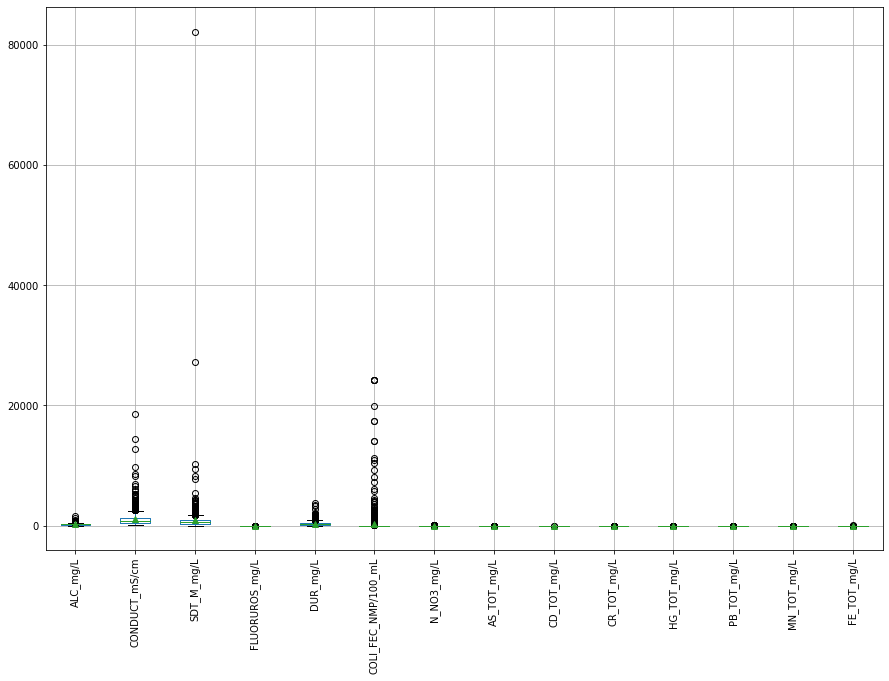

In [ ]:
# Identificamos los outliers

outliers = new_df.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

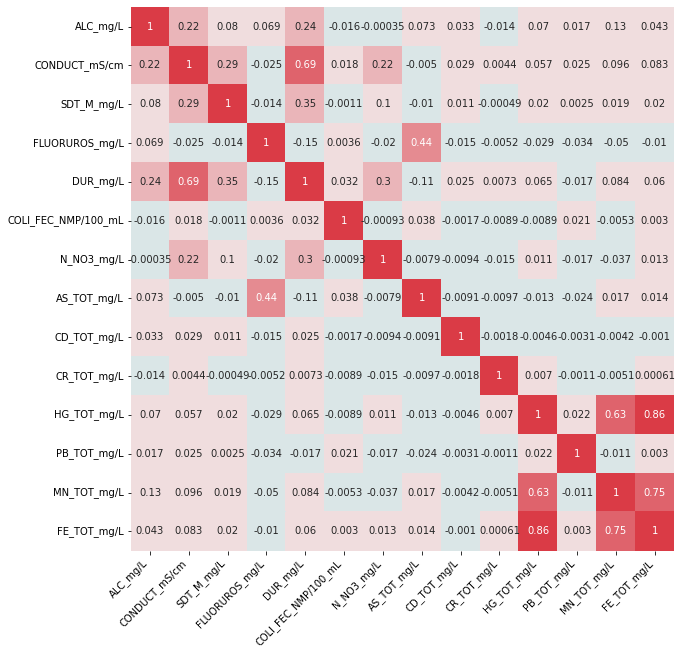

In [ ]:
# Analizamos las correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    new_df.corr(),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(200, 10, n=10),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [ ]:
# Obtenemos los datos de geolocalización
loc_df = df[['LONGITUD','LATITUD']]
loc_df

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


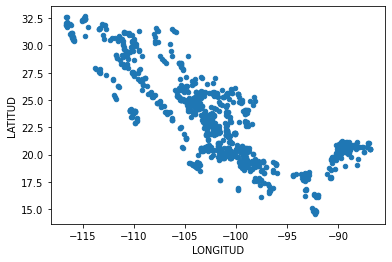

In [ ]:
loc_df.plot.scatter('LONGITUD','LATITUD')

In [ ]:
# Dado que no contamos con la variable de las coordenadas geográficas, debemos crearla para poder mostrar bien el mapa con geopandas

loc_df["COORDENADAS"] = list(zip(loc_df.LONGITUD, loc_df.LATITUD))
loc_df["COORDENADAS"] = loc_df["COORDENADAS"].apply(Point)
loc_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


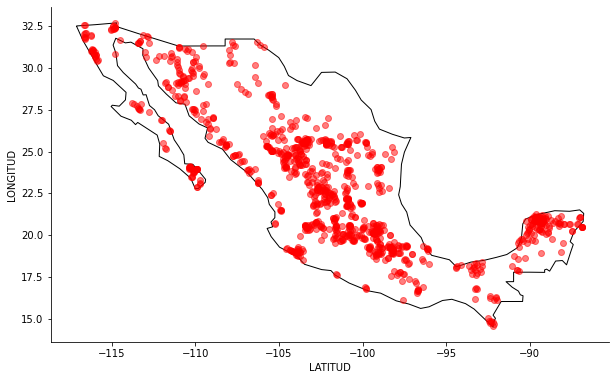

In [ ]:
# Hacemos entonces el plot usando geopandas para mostrar el mapa de México

map_points = gpd.GeoDataFrame(loc_df, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

map_points.plot(ax=gax, color='red', alpha = 0.5)

In [ ]:
map_points

,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


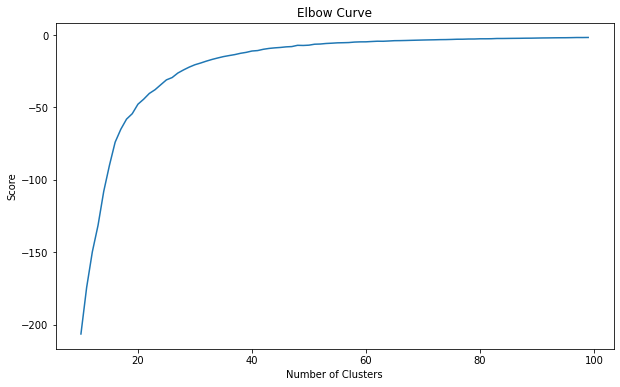

In [ ]:
# Ahora, para hacer los K-Means hay que agrupar los datos

from sklearn.cluster import KMeans

clusters = range(10,100) 
kmeans = [KMeans(n_clusters=i) for i in clusters]
Y_axis = loc_df[['LATITUD']]
X_axis = loc_df[['LONGITUD']]

# Para hacer el plot
kmeans_calc = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualización
plt.figure(figsize=(10,6))
plt.plot(clusters, kmeans_calc)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
X = df[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=20).fit(X) # lo hacemos con 20 clusters dado el punto óptimo observado
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X) 

# Centroides
C = kmeans.cluster_centers_ 

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

centroids_points = gpd.GeoDataFrame(C_DF, geometry="Coordinates")

centroids_points

,0,1,Coordinates
0,-100.978442,20.227062,POINT (-100.97844 20.22706)
1,-108.332925,25.658012,POINT (-108.33292 25.65801)
2,-87.659191,20.587765,POINT (-87.65919 20.58776)
3,-110.813080,30.001222,POINT (-110.81308 30.00122)
4,-105.097391,27.083212,POINT (-105.09739 27.08321)
5,-97.017586,17.896362,POINT (-97.01759 17.89636)
6,-102.463834,22.649291,POINT (-102.46383 22.64929)
7,-103.603893,19.996733,POINT (-103.60389 19.99673)
8,-115.350697,31.630071,POINT (-115.35070 31.63007)
9,-92.316415,15.472939,POINT (-92.31641 15.47294)


In [ ]:
map_points['COLOR']= df['SEMAFORO']
map_points['CLUSTER'] = labels
map_points

,LONGITUD,LATITUD,COORDENADAS,COLOR,CLUSTER
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde,6
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde,6
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo,6
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde,6
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo,15
...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo,13
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo,13
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo,13
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde,13


In [ ]:
# Agregamos las modas por color a los puntos centroides

lista_de_modas=[]

for i in range(0,20):
  dataset = pd.DataFrame() #Creamos un dataframe hueco
  dataset = map_points[map_points.CLUSTER == i].copy() # Aqui va copiando cada seccion del dataframe segun se recorre cada numero de cluster.
  moda = dataset['COLOR'].mode()[0] #Aqui va creando la moda de cada color
  lista_de_modas.append(moda) #Vamos a;adiendo la moda, nos va a dar una lista de 20 elementos

In [ ]:
centroids_points['MODA'] = lista_de_modas
centroids_points

,0,1,Coordinates,MODA
0,-100.978442,20.227062,POINT (-100.97844 20.22706),Verde
1,-108.332925,25.658012,POINT (-108.33292 25.65801),Amarillo
2,-87.659191,20.587765,POINT (-87.65919 20.58776),Amarillo
3,-110.813080,30.001222,POINT (-110.81308 30.00122),Verde
4,-105.097391,27.083212,POINT (-105.09739 27.08321),Rojo
5,-97.017586,17.896362,POINT (-97.01759 17.89636),Verde
6,-102.463834,22.649291,POINT (-102.46383 22.64929),Rojo
7,-103.603893,19.996733,POINT (-103.60389 19.99673),Rojo
8,-115.350697,31.630071,POINT (-115.35070 31.63007),Amarillo
9,-92.316415,15.472939,POINT (-92.31641 15.47294),Verde


In [ ]:
#Ahora tenemos que hacer la traduccion para poder meterlo a la grafica de abajo
#lista_de_modas = lista_de_modas.map({"Amarillo": "yellow", "Verde": "green", "Rojo": "red"})
lista_gringa = []

for i in range(0,20):
  if lista_de_modas[i] == 'Verde':
    lista_gringa.append('green')
  if lista_de_modas[i] == 'Rojo':
    lista_gringa.append('red')
  if lista_de_modas[i] == 'Amarillo':
    lista_gringa.append('yellow')

In [ ]:
lista_gringa_individual = []

for i in range(0,1068):
  if map_points.COLOR[i] == 'Verde':
    lista_gringa_individual.append('green')
  if map_points.COLOR[i] == 'Rojo':
    lista_gringa_individual.append('red')
  if map_points.COLOR[i] == 'Amarillo':
    lista_gringa_individual.append('yellow')

len(lista_gringa_individual)

1068

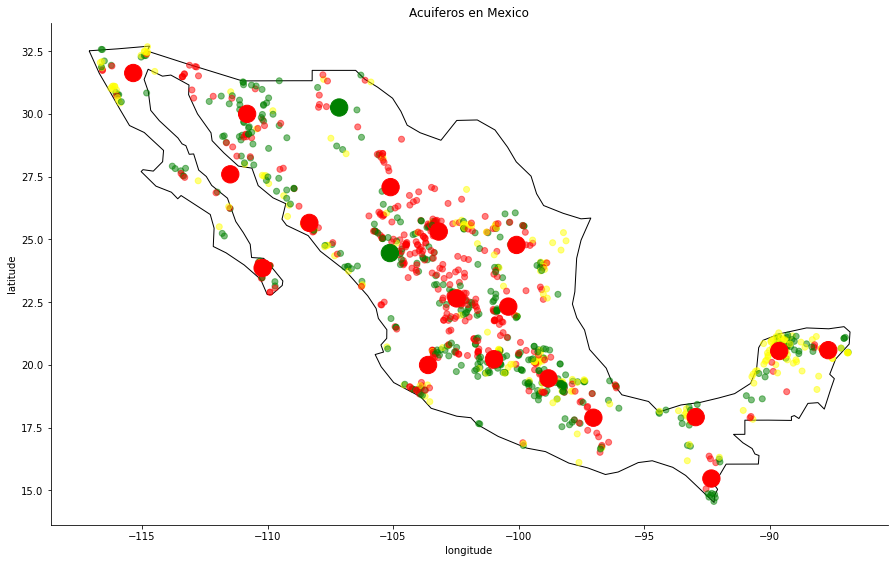

In [ ]:
# Graficamos los centroides

fig, gax = plt.subplots(figsize=(15,10))
# colores = ['red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow']
color_asig = []
color_individual = map_points['COLOR']

for row in labels:
  color_asig.append(lista_gringa[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

map_points.plot(ax=gax, color=lista_gringa_individual, alpha = 0.5) 
centroids_points.plot(ax=gax, color=color_asig, alpha = 1, markersize = 300)  

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
df['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [ ]:
df['CALIDAD_COLI_FEC'].value_counts()

Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64